# Final Report
## Motivation
There are many ways of determining the quality of a neighborhood. Our group decided on three metrics, all important in their own right: Crime, Air Quality, and Food Cleanliness. A neighborhood with a good score on each of these, we decided, would be the most desirable neighborhood to live in.

## Crime

## Introduction
For my metric, I decide to use the police incident reports to determine which neighborhoods are the most secure to live in. Crime is always important to consider when determining the quality of a neighborhood. Communities with the least amount of crime are therefore the most desirable. We all want our communities to be safe.

## Metric
My metric will create an ascending bar graph of communities and their respective crime rates. The neighborhoods with the least amount of crime (i.e. at the beginning of the graph) will be the most desirable and weighted heavily above the others in our final equation:



In [1]:
import pandas as pd
import numpy as np
crime = pd.read_csv("crime-stats.csv")
crime_vs_neighborhood = {}
for row in range(crime.shape[0]):
    neighborhood = crime.iloc[row][7]
    if(neighborhood != None):
        crime_vs_neighborhood[neighborhood] = 0 if(neighborhood not in crime_vs_neighborhood) else crime_vs_neighborhood[neighborhood] + 1
    
print(crime_vs_neighborhood[""])
# creating the dict with each neighborhood being a key, and their value being the amount of crimes reported there.

KeyError: ''

In [6]:
print(crime_vs_neighborhood)
del crime_vs_neighborhood[nan]
# for some reason, this dictionary has some values populated as 'nan' which breaks the data visualization. i delete them here.

{'North Shore': 3620, 'Upper Lawrenceville': 1631, 'Northview Heights': 2599, 'Golden Triangle/Civic Arena': 4277, 'South Side Flats': 18565, 'Elliott': 2584, 'Homewood North': 6449, 'South Side Slopes': 4225, 'Carrick': 11603, 'South Oakland': 2341, nan: 6712, 'Bloomfield': 8504, 'Beechview': 5573, 'Bluff': 4679, 'Strip District': 3392, 'Mount Washington': 7500, 'East Carnegie': 397, 'Crafton Heights': 2809, 'Marshall-Shadeland': 5528, 'East Liberty': 8169, 'East Allegheny': 5877, 'Friendship': 1609, 'Arlington': 2101, 'Central Northside': 785, 'Spring Hill-City View': 2421, 'Brighton Heights': 6151, 'Westwood': 1602, 'East Hills': 4942, 'Brookline': 7562, 'South Shore': 1226, 'Lower Lawrenceville': 2526, 'Bedford Dwellings': 2589, 'Troy Hill-Herrs Island': 251, 'Central Oakland': 5081, 'Garfield': 3439, 'West End': 1242, 'West Oakland': 1914, 'Central Lawrenceville': 4295, 'Lincoln-Lemington-Belmar': 6670, 'Sheraden': 5996, 'Beltzhoover': 2036, 'Outside City': 2185, 'Squirrel Hill So

NameError: name 'nan' is not defined

{'Mt. Oliver Boro': 96, 'Mt. Oliver Neighborhood': 116, 'Outside County': 241, 'Troy Hill-Herrs Island': 251, 'Ridgemont': 290, 'Chartiers City': 326, 'New Homestead': 341, 'Outside State': 379, 'East Carnegie': 397, 'Swisshelm Park': 426, 'Summer Hill': 512, 'Mount Oliver': 519, 'Regent Square': 549, 'Hays': 555, 'Arlington Heights': 556, 'Oakwood': 612, 'St. Clair': 651, 'Esplen': 688, 'Glen Hazel': 761, 'Central Northside': 785, 'Fairywood': 797, 'Windgap': 868, 'Spring Garden': 912, 'Polish Hill': 1060, 'Allegheny West': 1074, 'Duquesne Heights': 1146, 'South Shore': 1226, 'West End': 1242, 'Bon Air': 1245, 'Terrace Village': 1411}


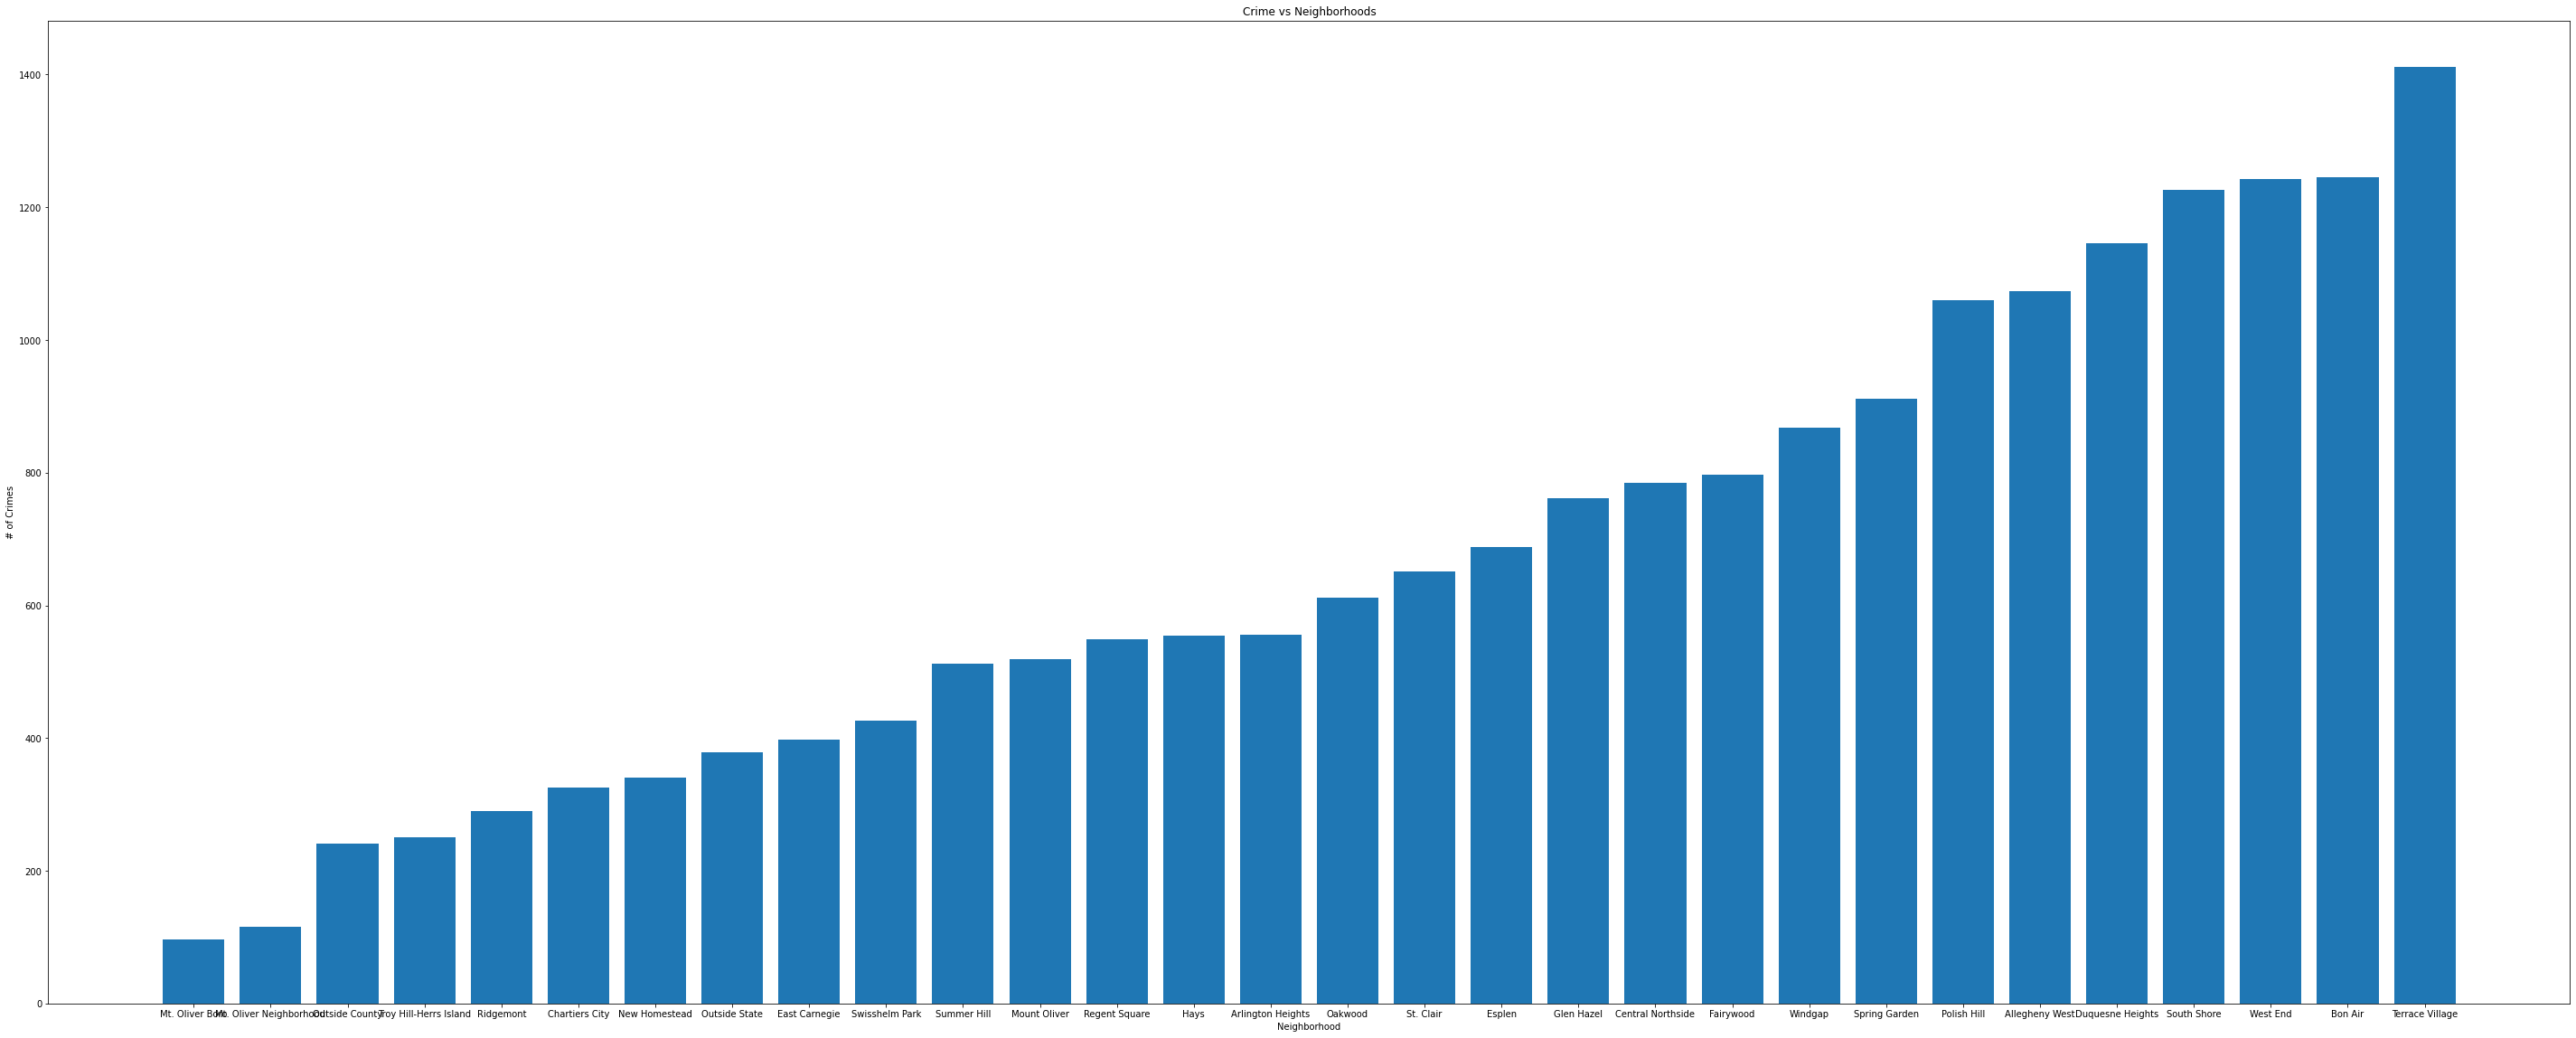

In [7]:
import matplotlib.pyplot as plt


crime_vals_sorted = dict(sorted(crime_vs_neighborhood.items(), key= lambda x:x[1])) # sorting
crime_vals_sorted_abridged = {}

c = 0
for key in crime_vals_sorted.keys():
    if(c == 30):
        break
    crime_vals_sorted_abridged[key] = crime_vals_sorted[key]
    c += 1
    
print(crime_vals_sorted_abridged)

neighborhoods = list(crime_vals_sorted_abridged.keys())
num_crimes = list(crime_vals_sorted_abridged.values())

fig = plt.figure(figsize = (50, 20))

plt.bar(range(len(crime_vals_sorted_abridged)), num_crimes, tick_label = neighborhoods)
plt.xlabel("Neighborhood")
plt.ylabel("# of Crimes")
plt.title("Crime vs Neighborhoods")
plt.show()

## Conclusion

In conclusion, there are many neighborhoods that have low crime rates. These neighborhoods are the most desirable to live in.
A limitation of my metric is that it doesn't account for the size of the neighborhood. This is a problem, because, for example, if a neighborhood that was around 3 miles in size had 50 crimes, and a neighborhood that was 300 miles in size had 50 crimes, these would technically be equal in crime. My dataset also might cover to large of a time-range, leading to possibly outdated crime trends.

## Resturant Violations

Quality of life is a big factor to see where I would want to live. One piece of that for me is having good food nearby. Where there's good food, there's other amenities. That's a trend that I've seen. Usually there'll be shopping, salons, and other general amenitites around places with resturants. Starting with the number of health code violations, we can generalize what neighborhoods have high quality amenities. My theory is that the cleaner the resturants, the better the rest of the amenities will be.

# Metric

The metric I will use to determine the best neighborhood is finding out which neighborhood has the highest quality resturants. I'll be defining the quality of the resturant through the number of recorded health code violations, the lower the better. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a8c02dbb0>]],
      dtype=object)

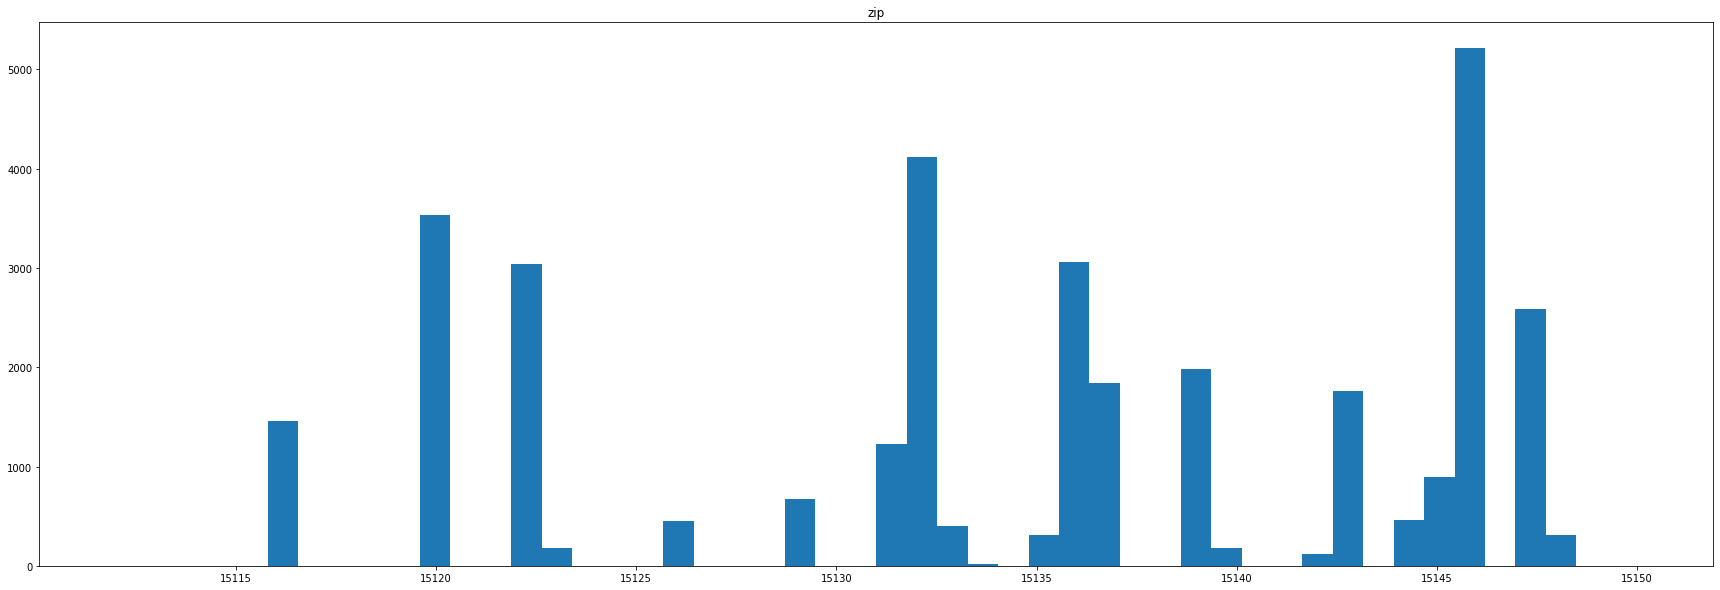

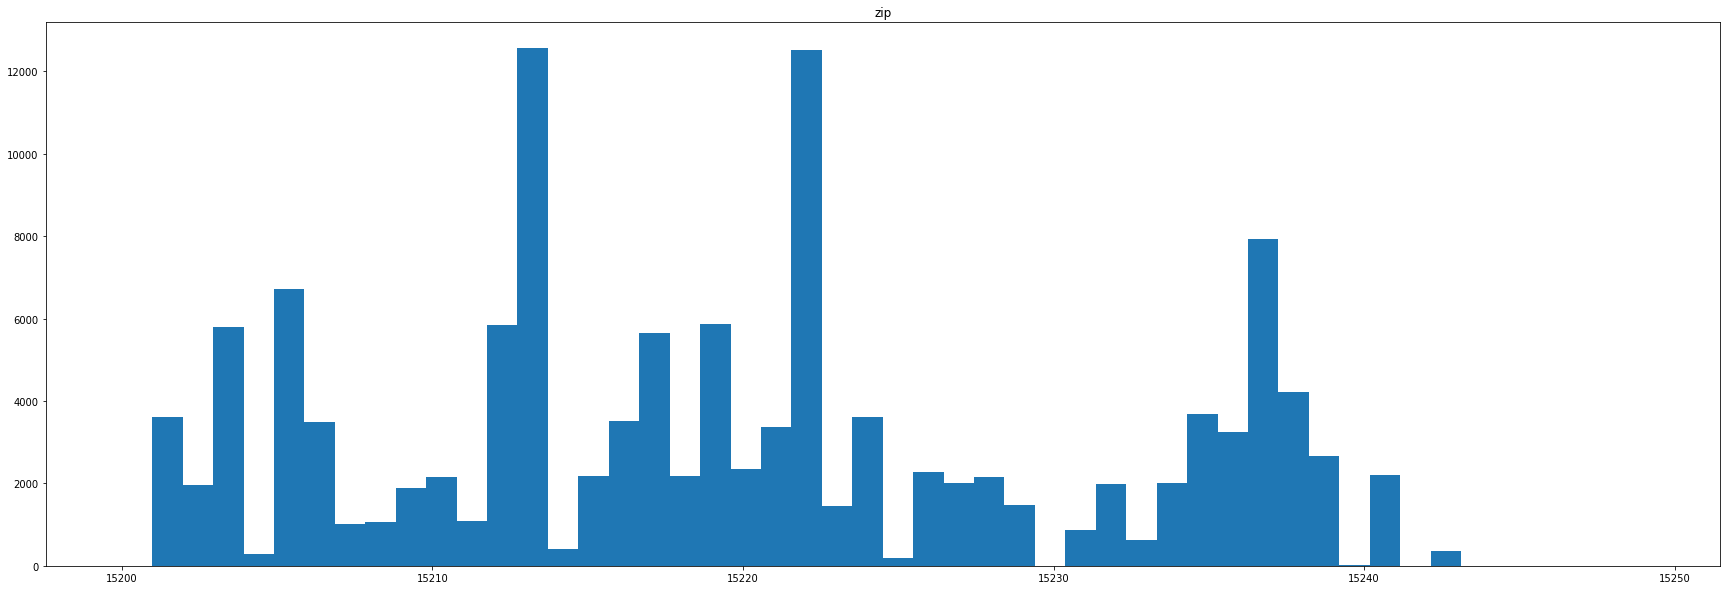

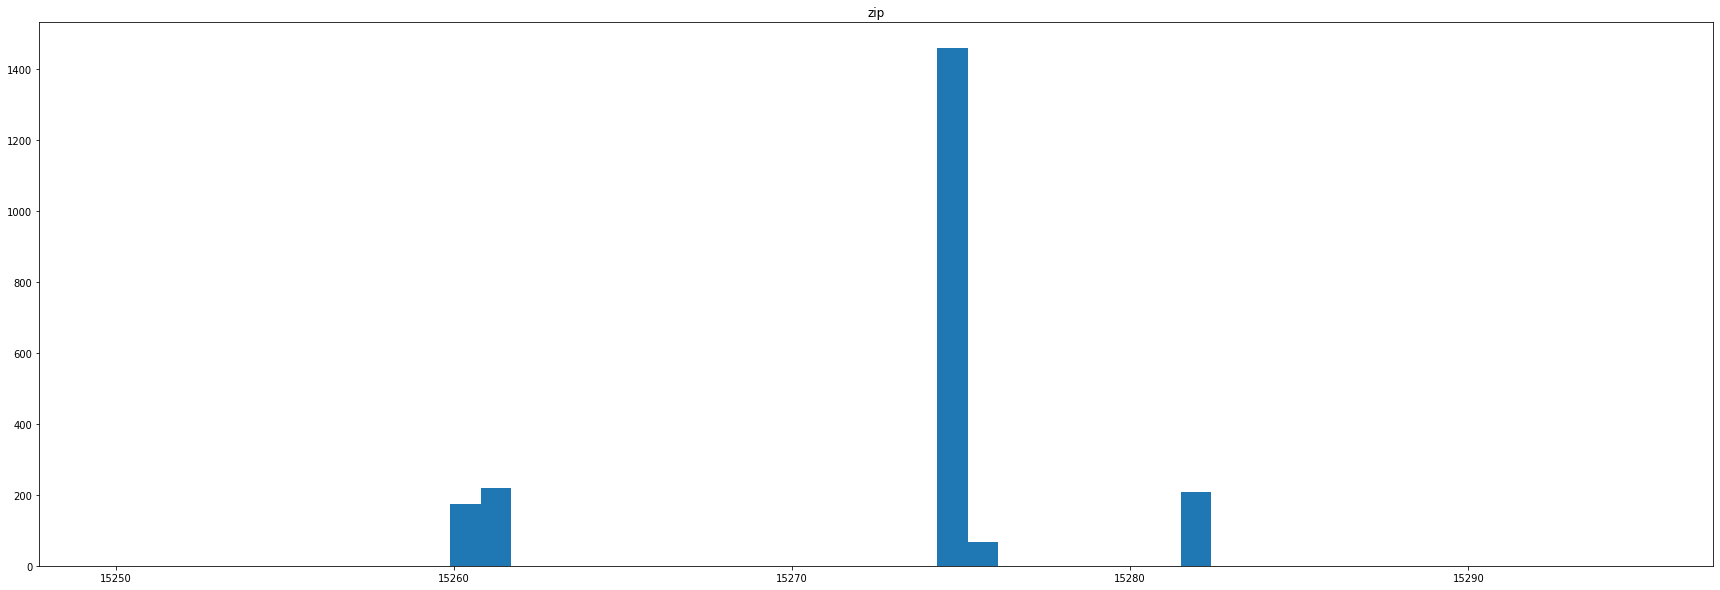

In [4]:
import pandas as pd
#import fpsnippets
import numpy
%matplotlib inline
#importing all the libraries needed

vio = pd.read_csv('ResturantViolations.csv', usecols = ['zip', 'facility_name'])
#reads the csv file and converts it into a data frame
vio = vio.query('zip > 15112  and zip < 15295')
#filters the data to the range of Offical Pittsburgh Zipcodes

vio.hist(column = "zip", grid = False, bins = 50, figsize = (30,10), range =[15112, 15150])
vio.hist(column = "zip", grid = False, bins = 50, figsize = (30,10), range =[15200, 15249])
vio.hist(column = "zip", grid = False, bins = 50, figsize = (30,10), range =[15250, 15295])
#3 Different Graphs for better readability
#Calls the dataframe.histogram method, with columns being the data in the 'zip' column
#bins is the domain, range is the range of zipcodes
#figsize is the literal size of the drawing

In [8]:
count = vio['zip'].value_counts(ascending = True)# Ascending order so its fewest first
print(count.head(15))#Outputs top 15 zipcodes with the fewest violations

15230.0      1
15240.0     12
15134.0     17
15276.0     67
15142.0    116
15260.0    173
15140.0    179
15123.0    183
15225.0    187
15282.0    208
15261.0    220
15204.0    281
15148.0    309
15135.0    314
15243.0    367
Name: zip, dtype: int64


Best Neighborhood/s: 
1. Downtown Pittsburgh
2. Aspinwall
3. McKeesport
4. East Liberty
5. Presto

Worst Neighborhood/s: 
1. Oakland
2. Strip District
3. McKnight
4. Crafton
5. Hill District

## Conclusion + Thoughts

Overall we see a few things, Oakland and the Strip have, by far, the most healthcode violations. The Downtown zipcode also seems to have a suspiciously low number of violations. There are few zip codes that are not as highly populated, so in they'll naturally have fewer inspections and resturants. Using some human filtering, I'd probably have to say based off of everything from this data I'd want to live in East Liberty, but by the metric Downtown is the best place to live. On the other hand, I wouldn't want to live in any of the top worst based off of the number of healthcode violations.

There are a few issues with applying this dataset for my application. The biggest one I would say is the fact that everything is seperated by individual zipcodes. At first it seems like its not an issue, but there are areas that are almost purely residential that don't have many resturants, which would give it a higher score. Another issue is that proximity is something is not taken into account for the scores. There is also the issue of zipcodes being different sizes, and borders being non-exact. Throughout it all, there would have to be a standardized way to determine what is in what neighborhoods. 

# Final Metric

## Explanation
To determine the best neighborhood, we rewarded neighborhoods with points depending on how well they scored on our metric. For example, the neighborhood with the least amount of crime gets the most points, and all worse neighborhoods get lower points.

The neighborhood with the highest total points is therefore the best neighborhood to live in.


In [8]:
print(crime_vals_sorted_abridged)

{'Mt. Oliver Boro': 96, 'Mt. Oliver Neighborhood': 116, 'Outside County': 241, 'Troy Hill-Herrs Island': 251, 'Ridgemont': 290, 'Chartiers City': 326, 'New Homestead': 341, 'Outside State': 379, 'East Carnegie': 397, 'Swisshelm Park': 426, 'Summer Hill': 512, 'Mount Oliver': 519, 'Regent Square': 549, 'Hays': 555, 'Arlington Heights': 556, 'Oakwood': 612, 'St. Clair': 651, 'Esplen': 688, 'Glen Hazel': 761, 'Central Northside': 785, 'Fairywood': 797, 'Windgap': 868, 'Spring Garden': 912, 'Polish Hill': 1060, 'Allegheny West': 1074, 'Duquesne Heights': 1146, 'South Shore': 1226, 'West End': 1242, 'Bon Air': 1245, 'Terrace Village': 1411}


In [18]:
crime_weighted = {}
points = 50
index = 0
for key in crime_vals_sorted_abridged.keys():
    index += 1
    crime_weighted[key] = points
    points = (int)(points/1.2)
    if index == 15:
        break
    
print(crime_weighted)
    
    

{'Mt. Oliver Boro': 50, 'Mt. Oliver Neighborhood': 41, 'Outside County': 34, 'Troy Hill-Herrs Island': 28, 'Ridgemont': 23, 'Chartiers City': 19, 'New Homestead': 15, 'Outside State': 12, 'East Carnegie': 10, 'Swisshelm Park': 8, 'Summer Hill': 6, 'Mount Oliver': 5, 'Regent Square': 4, 'Hays': 3, 'Arlington Heights': 2}


In [21]:
vioRank = {}
points = 50

count = count.head(15)

for index, value in count.items():
    vioRank[index] = points
    points = (int)(points/1.2)
        
print(vioRank)

{15230.0: 50, 15240.0: 41, 15134.0: 34, 15276.0: 28, 15142.0: 23, 15260.0: 19, 15140.0: 15, 15123.0: 12, 15225.0: 10, 15282.0: 8, 15261.0: 6, 15204.0: 5, 15148.0: 4, 15135.0: 3, 15243.0: 2}


# Conclusion

In conclusion, the best neighborhood a.k.a the neighborhood that scored the highest on our metric is a tie between Downtown Pittsburgh and Mt. Oliver Boro. They both scored 50 in our points system. 